<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS INDIVIDU**

In [1]:
# 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2
import cv2
import numpy as np
from matplotlib import pyplot as plt

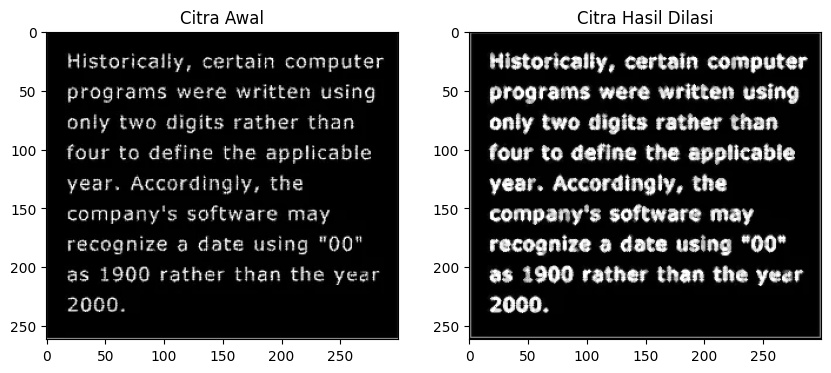

In [3]:
# 3
image_path = '/content/drive/MyDrive/Week2/Images/morphology.png'
image = cv2.imread(image_path, 0)

def dilate_image(image):
    structuring_element = np.array([[0, 1, 0],
                                    [1, 1, 1],
                                    [0, 1, 0]], dtype=np.uint8)

    rows, cols = image.shape

    dilated_image = np.zeros_like(image)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = image[i-1:i+2, j-1:j+2]

            dilated_image[i, j] = np.max(neighborhood * structuring_element)

    return dilated_image

dilated_image = dilate_image(image)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Dilated image
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('on')

plt.show()

Structuring Element (3x3 Cross):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


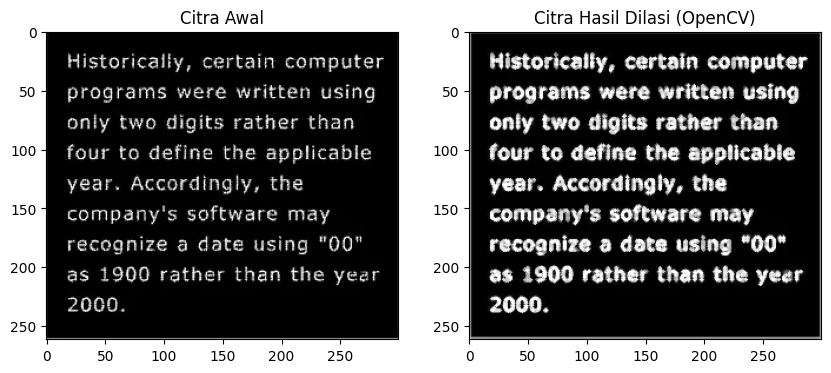

In [4]:
# 4
image = cv2.imread(image_path, 0)

structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

dilated_image_cv = cv2.dilate(image, structuring_element)

print("Structuring Element (3x3 Cross):")
print(structuring_element)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Dilated image
plt.subplot(1, 2, 2)
plt.imshow(dilated_image_cv, cmap='gray')
plt.title('Citra Hasil Dilasi (OpenCV)')
plt.axis('on')

plt.show()

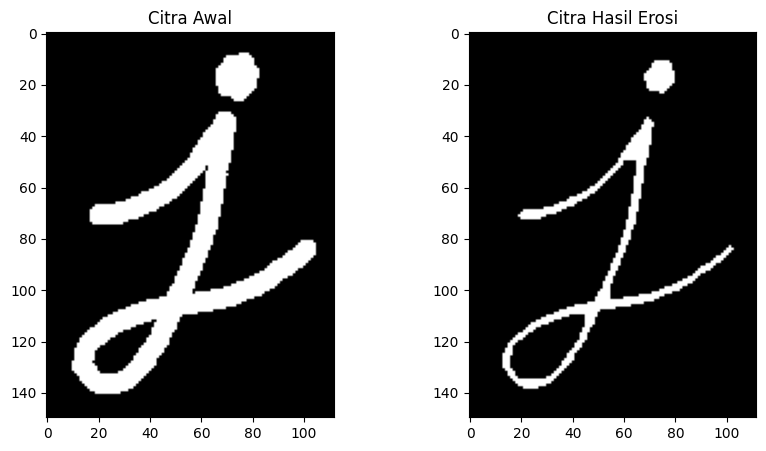

In [5]:
# 5
image_path_erosion = '/content/drive/MyDrive/Week2/Images/j.png'
image_erosion = cv2.imread(image_path_erosion, 0)

def erode_image(image):
    structuring_element = np.ones((5, 5), dtype=np.uint8)

    rows, cols = image.shape

    eroded_image = np.zeros_like(image)

    for i in range(2, rows - 2):
        for j in range(2, cols - 2):
            neighborhood = image[i-2:i+3, j-2:j+3]

            eroded_image[i, j] = np.min(neighborhood * structuring_element)

    return eroded_image

eroded_image = erode_image(image_erosion)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_erosion, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Eroded image
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('on')

plt.show()

Structuring Element (5x5 Square):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


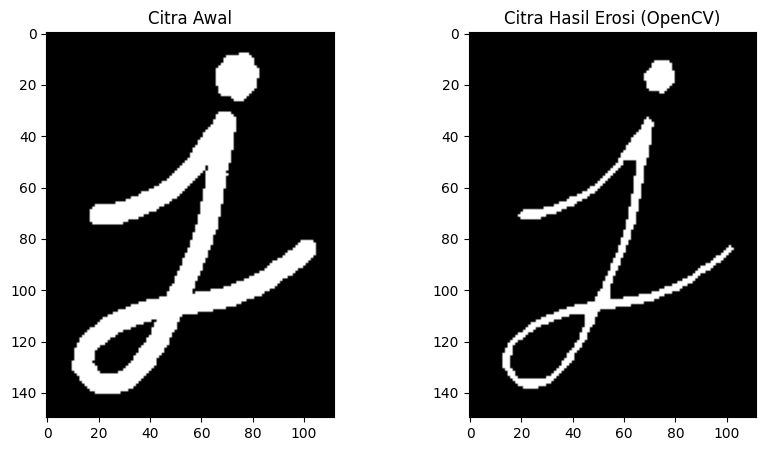

In [6]:
# 6
image_erosion = cv2.imread(image_path_erosion, 0)

structuring_element_5x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

eroded_image_cv = cv2.erode(image_erosion, structuring_element_5x5)

print("Structuring Element (5x5 Square):")
print(structuring_element_5x5)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_erosion, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Eroded image
plt.subplot(1, 2, 2)
plt.imshow(eroded_image_cv, cmap='gray')
plt.title('Citra Hasil Erosi (OpenCV)')
plt.axis('on')

plt.show()

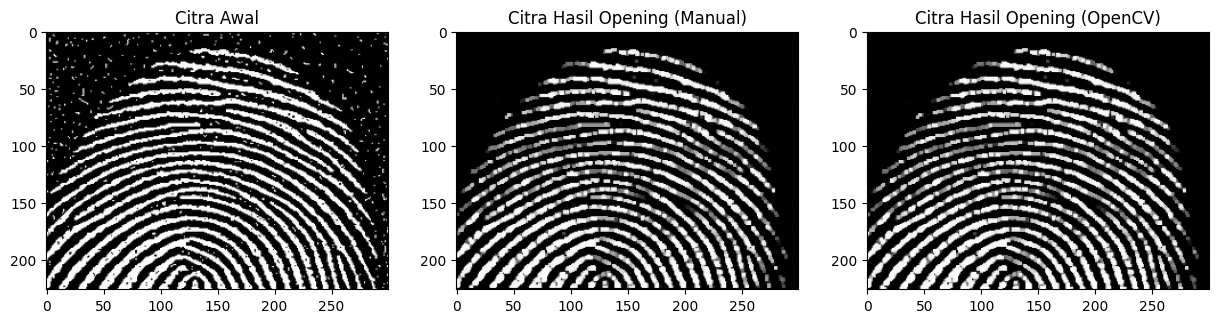

In [7]:
# 7
image_path_fingerprint = '/content/drive/MyDrive/Week2/Images/fingerprint.png'
image_fingerprint = cv2.imread(image_path_fingerprint, 0)

def manual_opening(image):
    structuring_element = np.ones((3, 3), dtype=np.uint8)

    rows, cols = image.shape

    eroded_image = np.zeros_like(image)
    opened_image = np.zeros_like(image)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = image[i-1:i+2, j-1:j+2]
            eroded_image[i, j] = np.min(neighborhood * structuring_element)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = eroded_image[i-1:i+2, j-1:j+2]
            opened_image[i, j] = np.max(neighborhood * structuring_element)

    return eroded_image, opened_image

eroded_image_manual, opened_image_manual = manual_opening(image_fingerprint)

structuring_element_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened_image_cv = cv2.morphologyEx(image_fingerprint, cv2.MORPH_OPEN, structuring_element_3x3)

# Plotting the original and results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_fingerprint, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Manual Opening result
plt.subplot(1, 3, 2)
plt.imshow(opened_image_manual, cmap='gray')
plt.title('Citra Hasil Opening (Manual)')
plt.axis('on')

# OpenCV Opening result
plt.subplot(1, 3, 3)
plt.imshow(opened_image_cv, cmap='gray')
plt.title('Citra Hasil Opening (OpenCV)')
plt.axis('on')

plt.show()

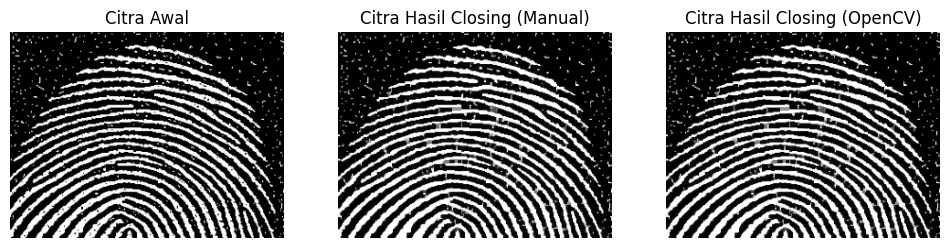

In [8]:
# 8
image_path = '/content/drive/MyDrive/Week2/Images/fingerprint.png'
fingerprint_img = cv2.imread(image_path, 0)

kernel = np.ones((3, 3), np.uint8)

dilated_img = cv2.dilate(fingerprint_img, kernel, iterations=1)
closing_manual = cv2.erode(dilated_img, kernel, iterations=1)

closing_opencv = cv2.morphologyEx(fingerprint_img, cv2.MORPH_CLOSE, kernel)

# Plotting the original and results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(fingerprint_img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Manual Closing result
plt.subplot(1, 3, 2)
plt.imshow(closing_manual, cmap='gray')
plt.title('Citra Hasil Closing (Manual)')
plt.axis('off')

# OpenCV Closing result
plt.subplot(1, 3, 3)
plt.imshow(closing_opencv, cmap='gray')
plt.title('Citra Hasil Closing (OpenCV)')
plt.axis('off')

plt.show()

<ipython-input-39-7770d2bc91d0>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 1, 0.9, 0.9])


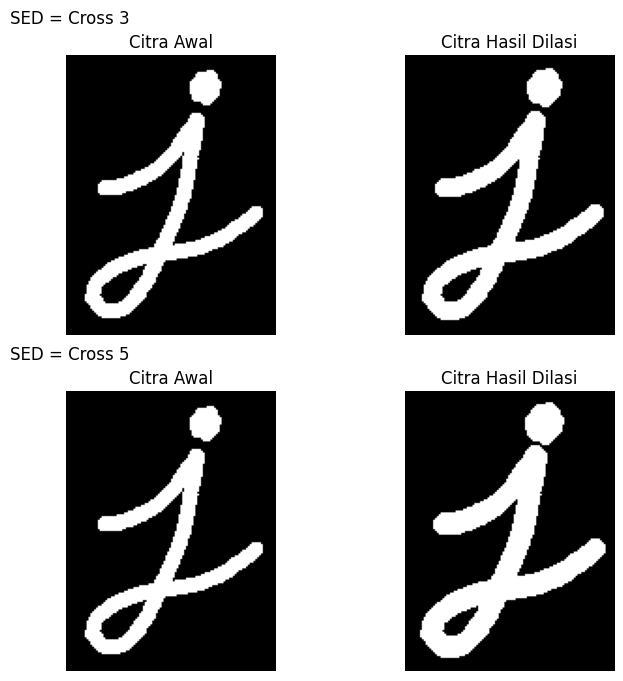

In [39]:
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Week2/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to make it binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Structuring elements (cross shape) with sizes 3x3 and 5x5
cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Apply dilation with the structuring elements
dilated_3x3 = cv2.dilate(binary_image, cross_3x3)
dilated_5x5 = cv2.dilate(binary_image, cross_5x5)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Adding SED labels above each pair of images
fig.text(0.1, 0.92, "SED = Cross 3", fontsize=12)
fig.text(0.1, 0.50, "SED = Cross 5", fontsize=12)

# Original and dilated images for 3x3
axs[0, 0].set_title("SED = Cross 3")
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title("Citra Awal")
axs[0, 0].axis('off')

axs[0, 1].imshow(dilated_3x3, cmap='gray')
axs[0, 1].set_title("Citra Hasil Dilasi")
axs[0, 1].axis('off')

# Original and dilated images for 5x5
axs[1, 0].imshow(binary_image, cmap='gray')
axs[1, 0].set_title("Citra Awal")
axs[1, 0].axis('off')

axs[1, 1].imshow(dilated_5x5, cmap='gray')
axs[1, 1].set_title("Citra Hasil Dilasi")
axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 1, 0.9, 0.9])
plt.show()

<ipython-input-37-6a105320daa7>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 1, 0.9, 0.9])  # Adjust layout to leave space for the titles


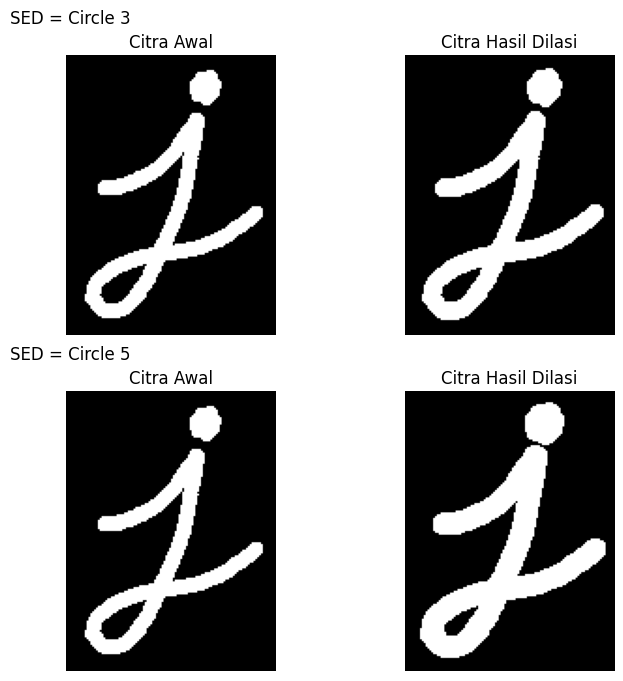

In [37]:
# 10
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Week2/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to make it binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Structuring elements (circular shape) with sizes 3x3 and 5x5
circle_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
circle_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Apply dilation with the structuring elements
dilated_3x3 = cv2.dilate(binary_image, circle_3x3)
dilated_5x5 = cv2.dilate(binary_image, circle_5x5)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Adding SED labels above each pair of images
fig.text(0.1, 0.92, "SED = Circle 3", fontsize=12)
fig.text(0.1, 0.50, "SED = Circle 5", fontsize=12)

# Original and dilated images for Circle 3x3
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title("Citra Awal")
axs[0, 0].axis('off')

axs[0, 1].imshow(dilated_3x3, cmap='gray')
axs[0, 1].set_title("Citra Hasil Dilasi")
axs[0, 1].axis('off')

# Original and dilated images for Circle 5x5
axs[1, 0].imshow(binary_image, cmap='gray')
axs[1, 0].set_title("Citra Awal")
axs[1, 0].axis('off')

axs[1, 1].imshow(dilated_5x5, cmap='gray')
axs[1, 1].set_title("Citra Hasil Dilasi")
axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 1, 0.9, 0.9])
plt.show()

<ipython-input-40-2430ec721865>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 1, 0.9, 0.9])


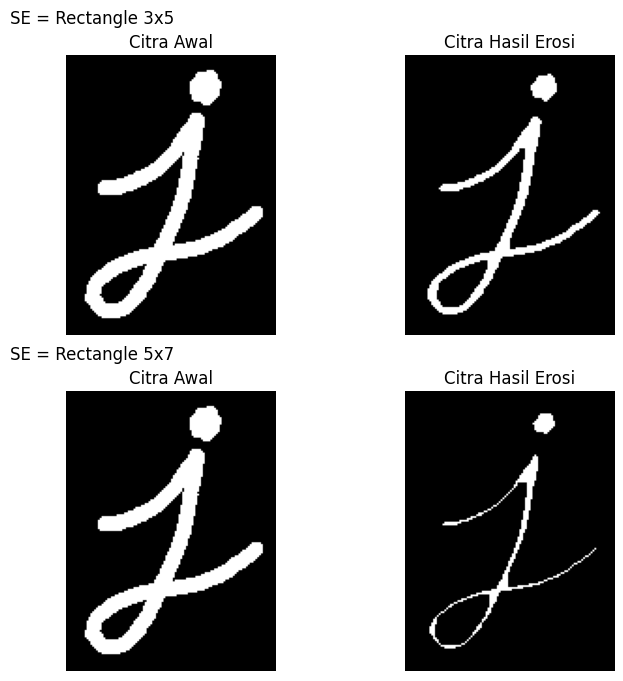

In [40]:
# 11
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Week2/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to make it binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Structuring elements (rectangle shape) with sizes 3x5 and 5x7
rectangle_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
rectangle_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Apply erosion with the structuring elements
eroded_3x5 = cv2.erode(binary_image, rectangle_3x5)
eroded_5x7 = cv2.erode(binary_image, rectangle_5x7)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Adding SE labels above each pair of images
fig.text(0.1, 0.92, "SE = Rectangle 3x5", fontsize=12)
fig.text(0.1, 0.50, "SE = Rectangle 5x7", fontsize=12)

# Original and eroded images for Rectangle 3x5
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title("Citra Awal")
axs[0, 0].axis('off')

axs[0, 1].imshow(eroded_3x5, cmap='gray')
axs[0, 1].set_title("Citra Hasil Erosi")
axs[0, 1].axis('off')

# Original and eroded images for Rectangle 5x7
axs[1, 0].imshow(binary_image, cmap='gray')
axs[1, 0].set_title("Citra Awal")
axs[1, 0].axis('off')

axs[1, 1].imshow(eroded_5x7, cmap='gray')
axs[1, 1].set_title("Citra Hasil Erosi")
axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 1, 0.9, 0.9])
plt.show()

<ipython-input-43-77728aa67c26>:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 1, 0.9, 0.9])


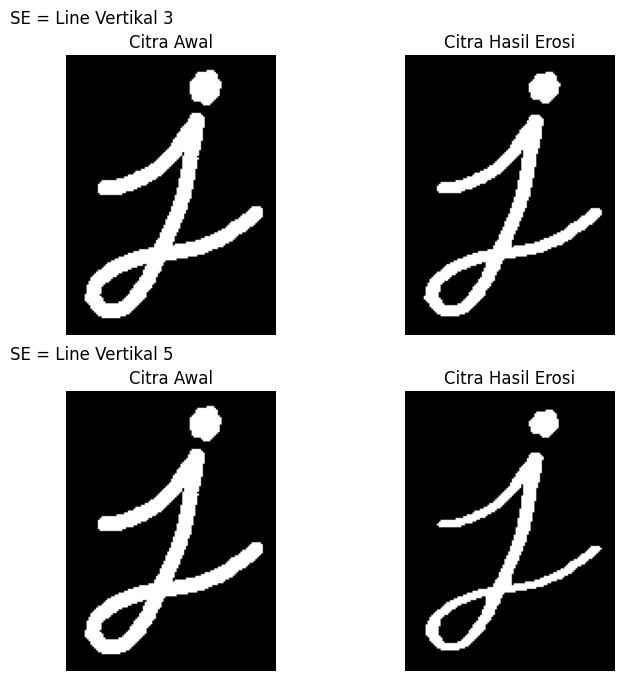

In [43]:
# 12
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Week2/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to make it binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define structuring elements (vertical lines of length 3 and 5)
se_vertical_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
se_vertical_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Apply erosion with the structuring elements
eroded_3 = cv2.erode(image, se_vertical_3)
eroded_5 = cv2.erode(image, se_vertical_5)

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Adding SE labels above each pair of images
fig.text(0.1, 0.92, "SE = Line Vertikal 3", fontsize=12)
fig.text(0.1, 0.50, "SE = Line Vertikal 5", fontsize=12)

# Original image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].axis('off')

# Eroded image with SE vertical line 3
axs[0, 1].imshow(eroded_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi')
axs[0, 1].axis('off')

# Original image for SE vertical line 5
axs[1, 0].imshow(image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].axis('off')

# Eroded image with SE vertical line 5
axs[1, 1].imshow(eroded_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi')
axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 1, 0.9, 0.9])
plt.show()

**TUGAS KELOMPOK**

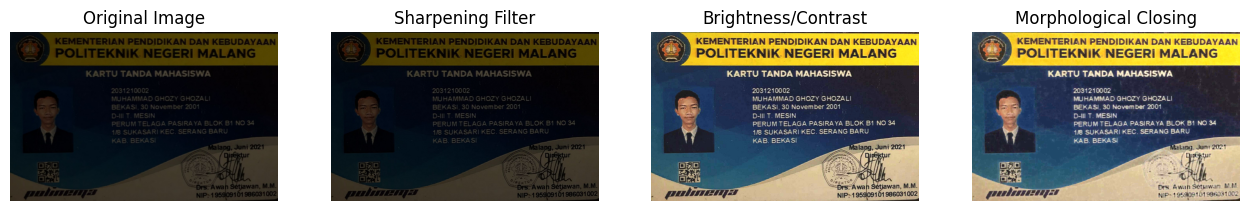

In [49]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Load and convert image to RGB
img = cv.imread('/content/ktm_uts.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Sharpening Filter
sharpen_kernel = np.array([[0, -1, 0],
                           [-1,  5, -1],
                           [0, -1, 0]])
sharpened = cv.filter2D(img_rgb, -1, sharpen_kernel)

# Contrast and Brightness adjustment
enhanced = cv.convertScaleAbs(sharpened, alpha=3, beta=25)

# Define a structuring element for morphological operations
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

# Apply Morphological Closing
morph_close = cv.morphologyEx(enhanced, cv.MORPH_CLOSE, kernel)

# Plot Images
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

# After Sharpening
plt.subplot(1, 5, 2)
plt.imshow(sharpened)
plt.title("Sharpening Filter")
plt.axis('off')

# Enhanced Image (brightness and contrast adjustment)
plt.subplot(1, 5, 3)
plt.imshow(enhanced)
plt.title("Brightness/Contrast")
plt.axis('off')

# After Morphological Closing
plt.subplot(1, 5, 4)
plt.imshow(morph_close)
plt.title("Morphological Closing")
plt.axis('off')

plt.show()